In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("dataset_cuaca_perjam-prophet.csv")

In [3]:
df

,date,year,month,day,hour,t2m,rh2m,ps,ws10m
0,11/30/2013,2013.0,11.0,30.0,7:00:00,27.36,78.94,100.80,3.17
1,11/30/2013,2013.0,11.0,30.0,8:00:00,28.47,73.19,100.85,2.65
2,11/30/2013,2013.0,11.0,30.0,9:00:00,29.44,69.56,100.83,2.04
3,11/30/2013,2013.0,11.0,30.0,10:00:00,30.12,67.38,100.77,1.73
4,11/30/2013,2013.0,11.0,30.0,11:00:00,30.44,66.38,100.70,1.87
...,...,...,...,...,...,...,...,...,...
1048570,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## PREPROCESSING

In [4]:
df.dropna(inplace=True)

In [5]:
df = df.drop(columns=['year', 'month', 'day'], axis=1)

In [6]:
df.isnull().sum()

date     0
hour     0
t2m      0
rh2m     0
ps       0
ws10m    0
dtype: int64

In [7]:
df.dtypes

date      object
hour      object
t2m      float64
rh2m     float64
ps       float64
ws10m    float64
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = pd.to_timedelta(df['hour'])
df['time'] = df['date'] + df['hour']

In [9]:
del df['date']
del df['hour']

In [10]:
df.rename(
    columns={"time": "ds", "ws10m": "y"},
    inplace=True,
)

In [11]:
df.dtypes

t2m            float64
rh2m           float64
ps             float64
y              float64
ds      datetime64[ns]
dtype: object

In [12]:
df.set_index(df['ds'], inplace = True)

In [13]:
# df['T_target'] = df.shift(-1)['T2M']
# df['RH_target'] = df.shift(-1)['RH2M']
# df['PS_target'] = df.shift(-1)['PS']
# df['WS_target'] = df.shift(-1)['WS10M']

In [14]:
df.dropna(inplace=True)

In [15]:
# # df.sort_index(inplace=True)

# # start_date = '2021-04-01 09:00:00'
# # end_date = '2022-05-01 16:00:00'

# df = df.iloc[-100:]

In [16]:
del df['ds']
del df['t2m']
del df['ps']
del df['rh2m']

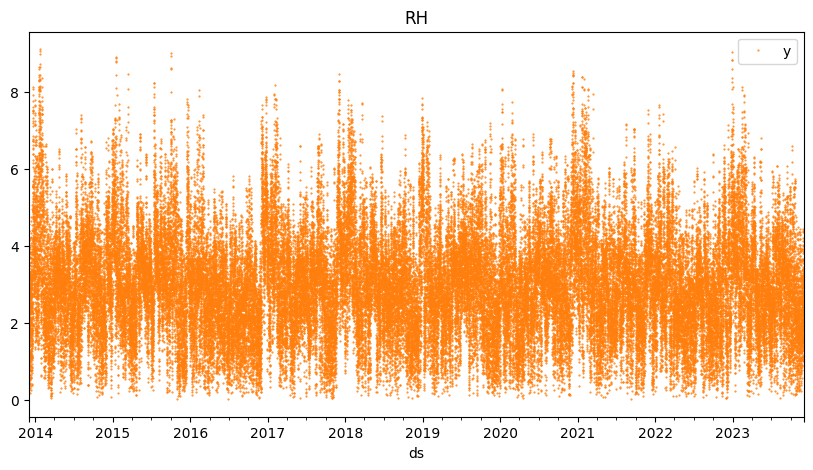

In [17]:
color_pal=sns.color_palette()
df.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[1], title = 'RH')
plt.show()

In [18]:
# df.sort_index(inplace=True)
# data_range = df.loc['2023-11-01 09:00:00':'2023-12-01 09:00:00']

In [19]:
# df['2021':'2022'].plot(subplots=True, figsize=(20,12))

In [20]:
# data_range['T2M'].plot()

## SPLITTING DATA

In [21]:
# df.reset_index(inplace=True)

In [22]:
df = df.sort_index()

train_percentage = 0.8
train_size = int(len(df) * train_percentage)

train_data = df[:train_size]
test_data = df[train_size:]


In [23]:
# model = Prophet()
# fit_model = model.fit(train_data.reset_index())

In [36]:
model = Prophet(changepoint_prior_scale=5.0,
                seasonality_prior_scale=10.0)
fit_model = model.fit(train_data.reset_index())

13:29:30 - cmdstanpy - INFO - Chain [1] start processing
13:30:06 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
# # future = pd.DataFrame({'ds': train_data['ds']})
# future = model.make_future_dataframe(periods=10000, freq='h')
# forecast = model.predict(future)

In [38]:
df

,y
ds,
2013-11-30 07:00:00,3.17
2013-11-30 08:00:00,2.65
2013-11-30 09:00:00,2.04
2013-11-30 10:00:00,1.73
2013-11-30 11:00:00,1.87
...,...
2023-12-01 02:00:00,1.50
2023-12-01 03:00:00,1.87
2023-12-01 04:00:00,1.86


In [39]:
# future = pd.DataFrame({'ds': train_data['ds']})
# future = model.make_future_dataframe(periods=10000, freq='h')
forecast = model.predict(test_data.reset_index())

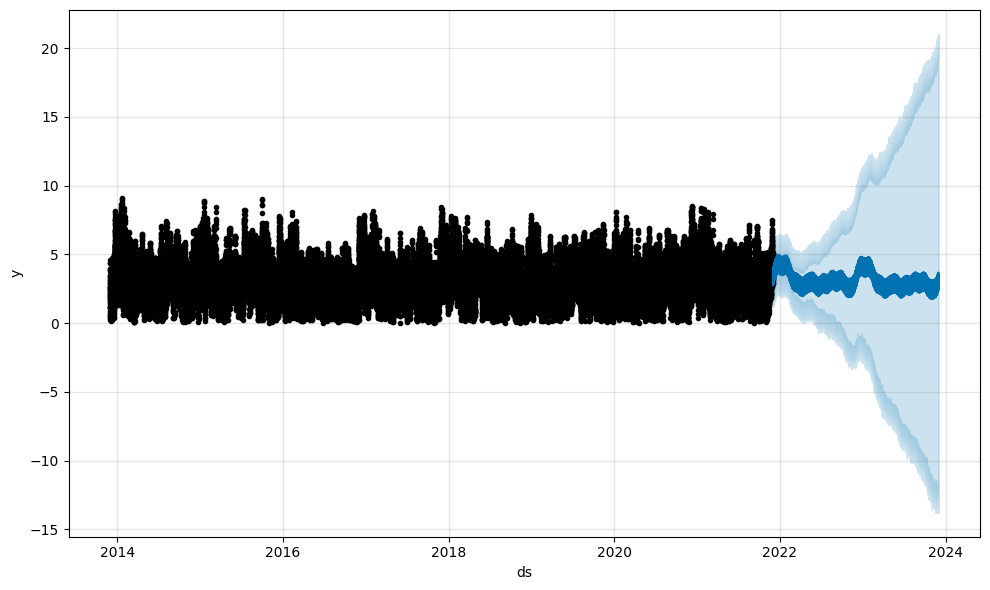

In [40]:
fig = model.plot(forecast)

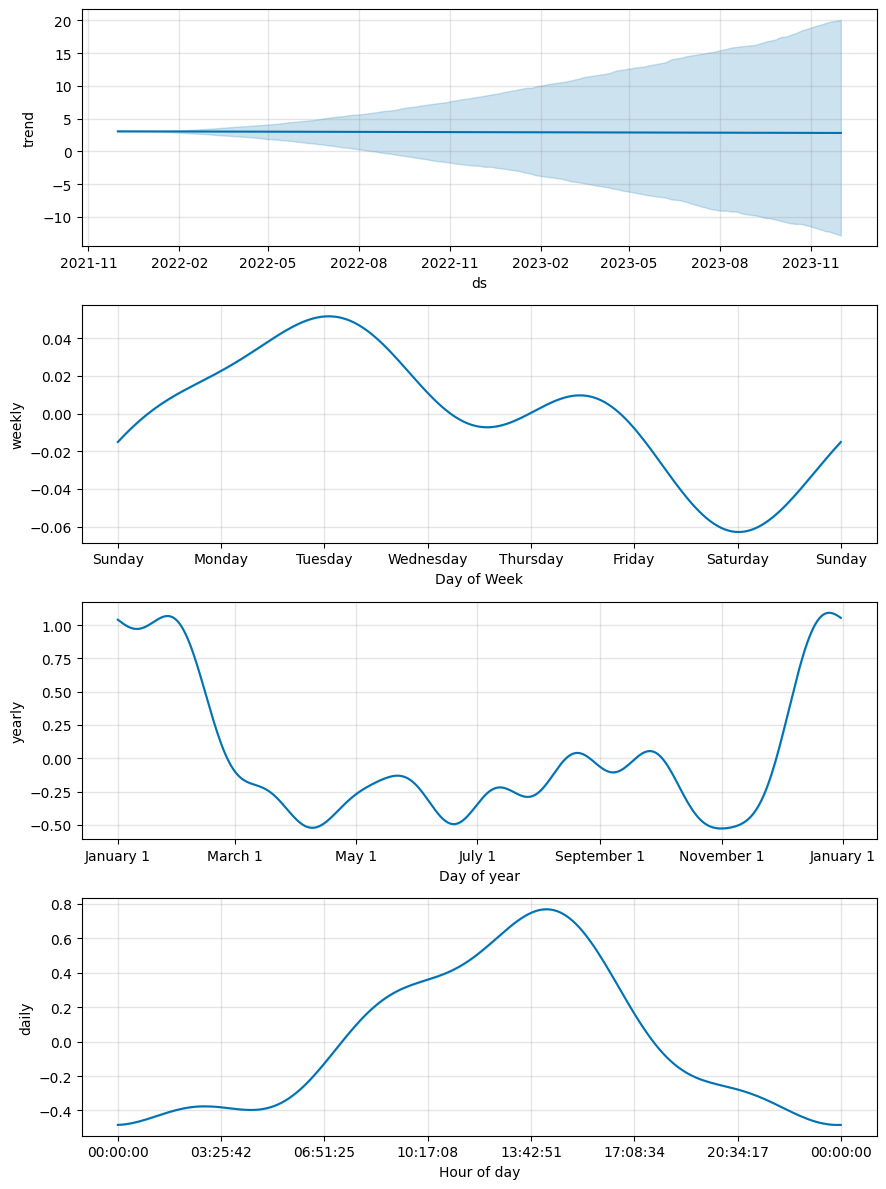

In [41]:
fig = model.plot_components(forecast)

In [42]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-30 16:00:00,3.063664,2.128219,5.211156,3.063664,3.063664,0.649657,0.649657,0.649657,0.500495,...,0.031255,0.031255,0.031255,0.117907,0.117907,0.117907,0.0,0.0,0.0,3.713321
1,2021-11-30 17:00:00,3.063650,1.988658,4.947969,3.063650,3.063650,0.353466,0.353466,0.353466,0.204409,...,0.028772,0.028772,0.028772,0.120285,0.120285,0.120285,0.0,0.0,0.0,3.417116
2,2021-11-30 18:00:00,3.063636,1.680704,4.678161,3.063636,3.063636,0.099781,0.099781,0.099781,-0.049120,...,0.026234,0.026234,0.026234,0.122667,0.122667,0.122667,0.0,0.0,0.0,3.163417
3,2021-11-30 19:00:00,3.063622,1.579746,4.532052,3.063622,3.063622,-0.044117,-0.044117,-0.044117,-0.192830,...,0.023661,0.023661,0.023661,0.125051,0.125051,0.125051,0.0,0.0,0.0,3.019505
4,2021-11-30 20:00:00,3.063607,1.528619,4.406738,3.063607,3.063607,-0.104318,-0.104318,-0.104318,-0.252831,...,0.021074,0.021074,0.021074,0.127439,0.127439,0.127439,0.0,0.0,0.0,2.959289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17530,2023-12-01 02:00:00,2.816830,-12.824561,19.527776,-12.839265,20.094846,-0.295347,-0.295347,-0.295347,-0.395100,...,-0.013404,-0.013404,-0.013404,0.113158,0.113158,0.113158,0.0,0.0,0.0,2.521484
17531,2023-12-01 03:00:00,2.816816,-13.321045,19.631838,-12.841348,20.097380,-0.277009,-0.277009,-0.277009,-0.376165,...,-0.016374,-0.016374,-0.016374,0.115531,0.115531,0.115531,0.0,0.0,0.0,2.539808
17532,2023-12-01 04:00:00,2.816802,-13.801611,19.817490,-12.843431,20.099915,-0.294463,-0.294463,-0.294463,-0.392939,...,-0.019430,-0.019430,-0.019430,0.117907,0.117907,0.117907,0.0,0.0,0.0,2.522340
17533,2023-12-01 05:00:00,2.816788,-13.475583,19.419605,-12.845514,20.102449,-0.286836,-0.286836,-0.286836,-0.384573,...,-0.022549,-0.022549,-0.022549,0.120285,0.120285,0.120285,0.0,0.0,0.0,2.529952


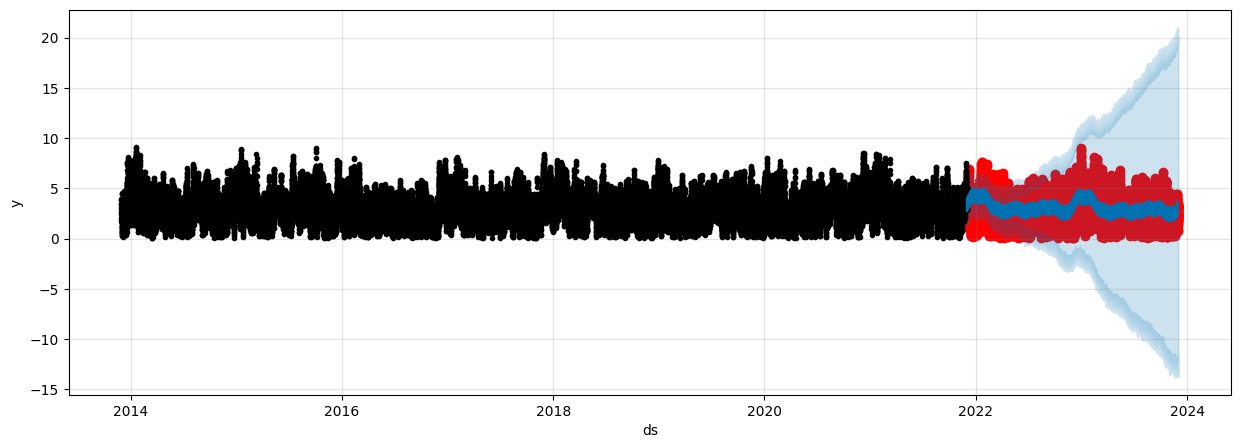

In [43]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test_data.index, test_data['y'], color='r')
fig = model.plot(forecast, ax=ax)

In [44]:
test_data['y']

ds
2021-11-30 16:00:00    3.32
2021-11-30 17:00:00    2.68
2021-11-30 18:00:00    2.15
2021-11-30 19:00:00    1.90
2021-11-30 20:00:00    1.66
                       ... 
2023-12-01 02:00:00    1.50
2023-12-01 03:00:00    1.87
2023-12-01 04:00:00    1.86
2023-12-01 05:00:00    1.75
2023-12-01 06:00:00    1.62
Name: y, Length: 17535, dtype: float64

In [45]:
mae = mean_absolute_error(test_data['y'], forecast['yhat'])
mse = mean_squared_error(test_data['y'], forecast['yhat'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((np.array(test_data['y']) - np.array(forecast['yhat'])) / np.array(test_data['y']))) * 100
r2 = r2_score(test_data['y'], forecast['yhat'])

In [46]:
print('mae :', mae)
print('mse :', mse)
print('rmse :', rmse)
print('mape :', mape)
print('r2 :', r2)

mae : 0.9823341051682443
mse : 1.5061305384020953
rmse : 1.2272451011929506
mape : 58.04524227611441
r2 : 0.06691425092867809


In [47]:
import joblib

joblib.dump(fit_model, 'prophet_model_ws.pkl')

['prophet_model_ws.pkl']